## <center> <u> AZUBI AFRICA COHORT 2 - LP 6 </center> <u>

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report


In [2]:
# Load the dataset for this project

PF_Train = pd.read_csv("C:/Users/KWABENABOATENG/Desktop/AZUBI AFRICA/6 MONTHS PROJECT/SIXTH MONTH/Paitients_Files_Train.csv")

#### <u> KEY DETAILS TO FURTHER UNDERSTAND THE DATASET </u>

ID  - Unique number to represent patient ID  <br>                                                                               
PRG - Plasma glucose  <br>  
PL  - Blood Work Result-1 (mu U/ml)   <br>                                                                                     
PR  - Blood Pressure (mm Hg) <br>  
SK  - Blood Work Result-2 (mm)  <br>  
TS  - Blood Work Result-3 (mu U/ml)   <br>                                                                               
M11 - Body mass index (weight in kg/(height in m)^2  <br>  
BD2 - Blood Work Result-4 (mu U/ml)  <br>  
Age - patients age  (years)  <br>  
Insurance - If a patient holds a valid insurance card  <br>  
Sepssis - Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise  <br>  

In [3]:
#Display the dataset

PF_Train

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [4]:
# Define new column names for better understanding
new_column_names = {
    'PRG': 'Plasma Glucose',
    'PL': 'Blood Work Result-1',
    'PR': 'Blood Pressure',
    'SK': 'Blood Work Result-2',
    'TS': 'Blood Work Result-3',
    'M11': 'Body Mass Index',
    'BD2': 'Blood Work Result-4'
}

PF_Train.rename(columns=new_column_names, inplace=True)

In [5]:
#Check the properties of the dataset

PF_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   599 non-null    object 
 1   Plasma Glucose       599 non-null    int64  
 2   Blood Work Result-1  599 non-null    int64  
 3   Blood Pressure       599 non-null    int64  
 4   Blood Work Result-2  599 non-null    int64  
 5   Blood Work Result-3  599 non-null    int64  
 6   Body Mass Index      599 non-null    float64
 7   Blood Work Result-4  599 non-null    float64
 8   Age                  599 non-null    int64  
 9   Insurance            599 non-null    int64  
 10  Sepssis              599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [6]:
#Check the shape of the dataset

PF_Train.shape

(599, 11)

In [7]:
#Check for null values in the dataset

PF_Train.isnull().sum()

ID                     0
Plasma Glucose         0
Blood Work Result-1    0
Blood Pressure         0
Blood Work Result-2    0
Blood Work Result-3    0
Body Mass Index        0
Blood Work Result-4    0
Age                    0
Insurance              0
Sepssis                0
dtype: int64

In [8]:
PF_Train.describe()

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot: title={'center': 'Plasma Glucose'}>,
        <AxesSubplot: title={'center': 'Blood Work Result-1'}>,
        <AxesSubplot: title={'center': 'Blood Pressure'}>],
       [<AxesSubplot: title={'center': 'Blood Work Result-2'}>,
        <AxesSubplot: title={'center': 'Blood Work Result-3'}>,
        <AxesSubplot: title={'center': 'Body Mass Index'}>],
       [<AxesSubplot: title={'center': 'Blood Work Result-4'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Insurance'}>]], dtype=object)

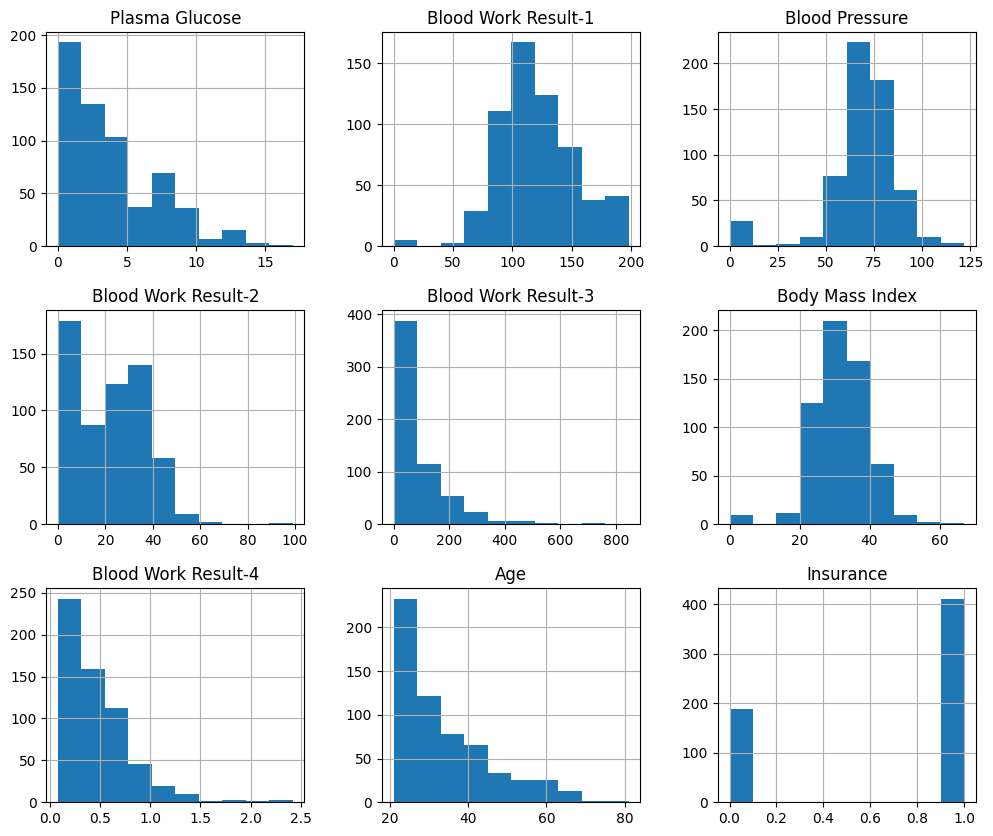

In [9]:
PF_Train.hist(figsize=(12, 10))

<AxesSubplot: >

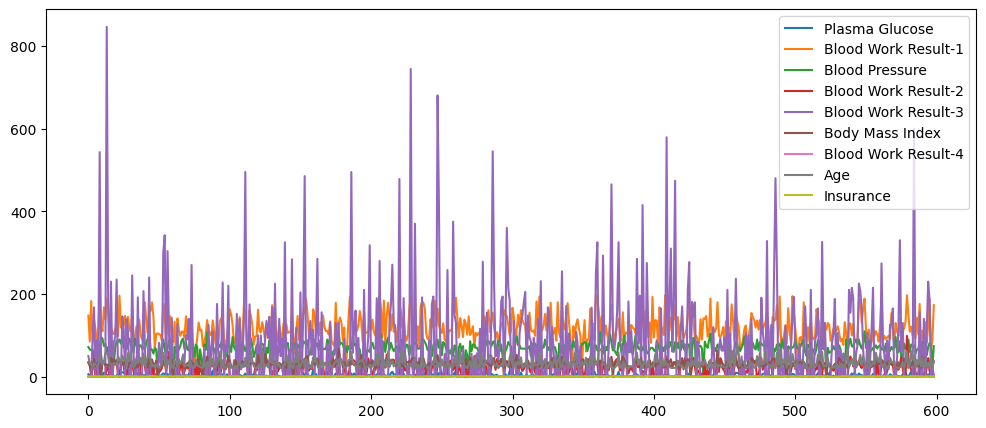

In [10]:
PF_Train.plot(figsize=(12, 5))

### EXPLORATORY DATA ANALYSIS

In [11]:
PF_Train_copy = PF_Train.copy

In [12]:
## DROP THE COLUMNS THAT ARE NOT NECESSARY FOR THIS ANALYSIS.
PF_Train.drop(columns = "ID", axis=1, inplace=True)

In [13]:
#Display the data set after deleting the unnecessary columns of the dataset.
PF_Train

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,Negative
595,0,188,82,14,185,32.0,0.682,22,1,Positive
596,0,67,76,0,0,45.3,0.194,46,1,Negative
597,1,89,24,19,25,27.8,0.559,21,0,Negative


In [23]:
PF_Train['Sepssis'].nunique()

2

In [24]:
PF_Train['Sepssis'].unique()

array([1, 0])

In [14]:
#Convert the Sepssis column from a categorical data to a numeric data.

le = LabelEncoder()
label = le.fit_transform(PF_Train['Sepssis'])
PF_Train.drop("Sepssis", axis=1, inplace=True)
PF_Train["Sepssis"] = label

In [15]:
PF_Train

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,0
595,0,188,82,14,185,32.0,0.682,22,1,1
596,0,67,76,0,0,45.3,0.194,46,1,0
597,1,89,24,19,25,27.8,0.559,21,0,0


In [30]:
X = PF_Train.iloc[:, :-1]
y = PF_Train.iloc[:, -1]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.3)

In [32]:
print("Shape of X_train is ",X_train.shape)
print("Shape of X_test is ",X_test.shape)
print("Shape of y_train is ",y_train.shape)
print("Shape of y_test is ",y_test.shape)

Shape of X_train is  (179, 9)
Shape of X_test is  (420, 9)
Shape of y_train is  (179,)
Shape of y_test is  (420,)


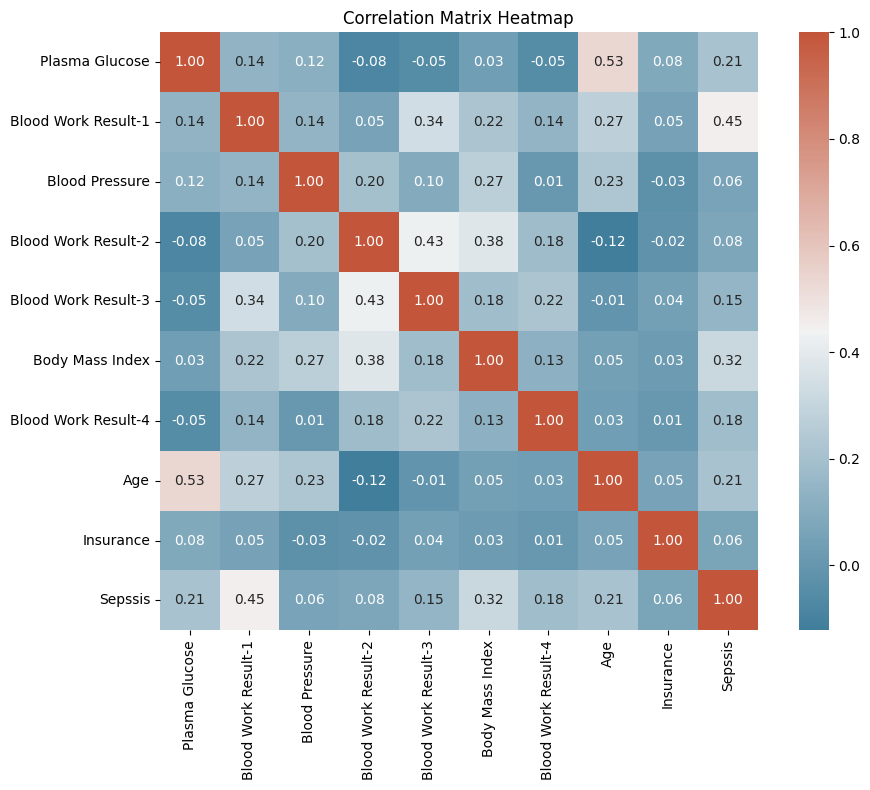

In [33]:
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(PF_Train.corr(), annot=True, fmt='.2f', square=True, cmap=cmap)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

In [34]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

C:\Users\KWABENABOATENG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [21]:
# Import libraries
#import os


#import plotly
#import string
#import re
#import matplotlib.pyplot as plt

#import nltk
#from nltk.corpus import stopwords
#from datasets import load_dataset
#from sklearn.model_selection import train_test_split

#from transformers import AutoModelForSequenceClassification
#from transformers import AutoTokenizer, AutoConfig, AdamW
#from transformers import TrainingArguments, Trainer, DataCollatorWithPadding
#from sklearn.metrics import mean_squared_error
#from huggingface_hub import notebook_login